In [104]:
# importar as biblioteca

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [105]:
# criando a base de dados 
# criando o conjunto de dados 
cliente_id = np.array([0,1,2,3,4,5,6,7,8,9,10]) # cria um array 
#utilizando a biblioteca numpy
valor_compra = np.array([40,150,500,5000,1834,2350,5000,6740,895,3300,4750])


In [106]:
#juntando as colunas dos dados
dados_compra=np.column_stack([cliente_id,valor_compra])

In [107]:
dados_compra

array([[   0,   40],
       [   1,  150],
       [   2,  500],
       [   3, 5000],
       [   4, 1834],
       [   5, 2350],
       [   6, 5000],
       [   7, 6740],
       [   8,  895],
       [   9, 3300],
       [  10, 4750]])

In [108]:
# aplicando o algoritmo kmeans
kmeans = KMeans(n_clusters=2) #armazena na variavel p modelo 
kmeans.fit(dados_compra) # cria o modelo kmeans

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [109]:
#avaliando a metrica do kmeans
sse = kmeans.inertia_
print("SSE: ", sse)

SSE:  10385640.833333334


In [110]:
# visualizando os resultados dos agrupamentos

labels = kmeans.labels_
centroids = kmeans.cluster_centers_ #somatina

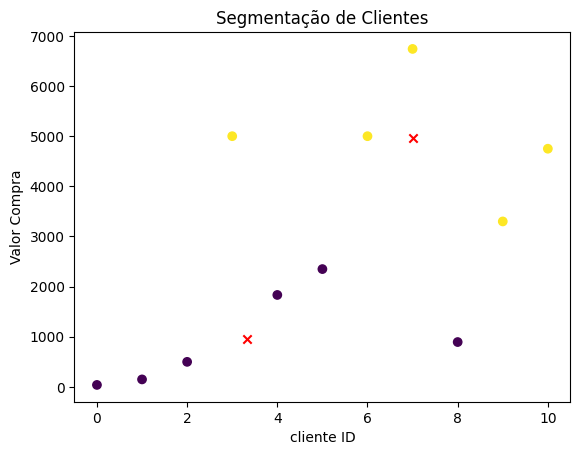

In [116]:
#plotando um grafico de dispersao dos clientes em cores 
# diferentes para cada grupo

plt.scatter(dados_compra[:,0], dados_compra[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x',color='red')
plt.xlabel('cliente ID')
plt.ylabel('Valor Compra')
plt.title('Segmentação de Clientes')
plt.show()

In [117]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(dados_compra, kmeans.predict(dados_compra))

0.6474028807916177

In [123]:
def avaliacao (dados_compra):
    inercia = []
    silhueta = []

    for k in range (2,5):
       kmeans = KMeans(n_clusters=k, random_state=45,
       n_init='auto')
       kmeans.fit(dados_compra)
       inercia.append(kmeans.inertia_)
       silhueta.append(f'k={k} -' + str (silhouette_score
       (dados_compra, kmeans.predict(dados_compra))))
    return silhueta, inercia


In [124]:
silhueta, inercia = avaliacao(dados_compra)
silhueta

['k=2 -0.6474028807916177',
 'k=3 -0.6402592747403472',
 'k=4 -0.6304805600706671']

In [126]:
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('numero de clusters')
    plt.ylabel('Inercia')
    plt.title('Metodo do cotovelo para determinação de k')
    plt.show()

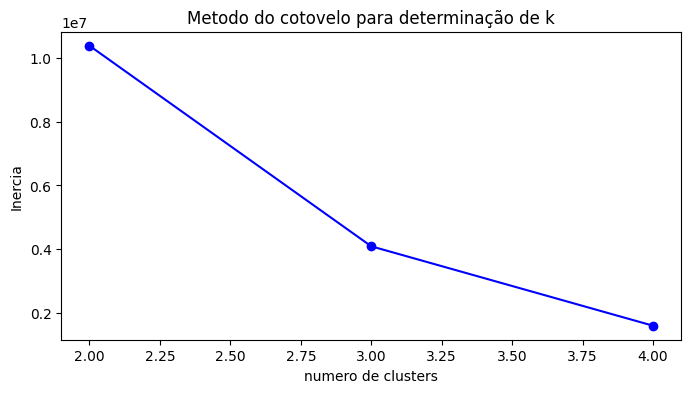

In [127]:
plot_cotovelo(inercia)

In [128]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 3 clusters: 0.640


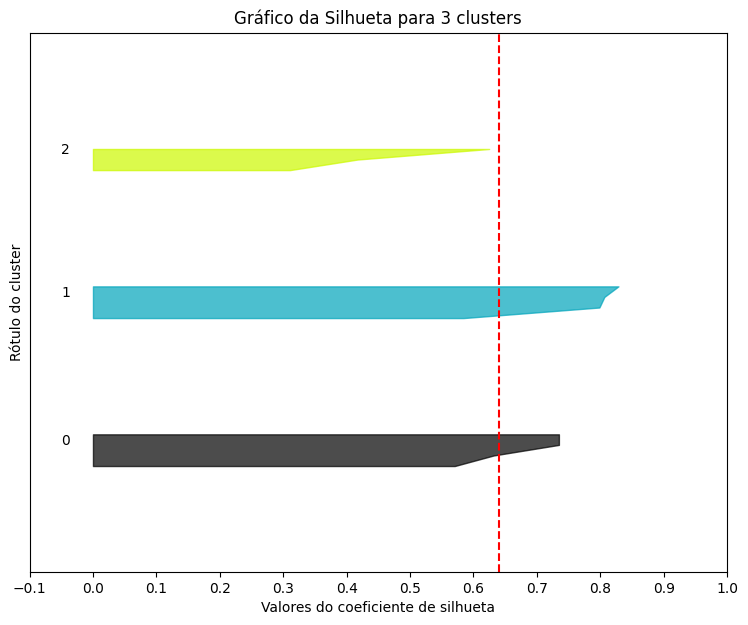

In [130]:
graf_silhueta(3, dados_compra)